In [1]:
from IPython.display import display, HTML

display(
    HTML("""
<style>
div.container{width:80% !important;}
div.prompt {min-width:70px;}
div#toc-header{margin-top:150px;}
span.toc-item-num{display:none;}
div.CodeMirror {font-family:Consolas}
div.input {font-family:Consolas}
</style>
"""))

# ※ naver Open Api를 사용한 한글 형태소 분석
- 네이버 지식인에 '전주 여행'과 '경주 여행' 검색 -> 명사만 추출(re) -> 빈도 분석(DataFrame), 시각화(워드클라우드)

# 1. 네이버 api를 활용하여 두 검색어 추출

In [2]:
# url = ''  # Naver Debelopers -> Documents -> 검색 -> 지식iN
# request.add_head()   Naver Debelopers -> Documents -> 검색 -> 지식iN

In [3]:
import os
import sys
import urllib.request
client_id = 'RgKYwTbMqCx5s9yGYqsT'
client_secret = '1INoZ2YkcD'
encText = urllib.parse.quote('전주 여행')
url = 'https://openapi.naver.com/v1/search/kin.json?query=' + encText
request = urllib.request.Request(url)
request.add_header('X-Naver-Client-Id', client_id)
request.add_header('X-Naver-Client-Secret', client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode == 200):
    response_body = response.read()
    print(response_body.decode('utf-8')[:500])
else:
    print('Error Code : ' + rescode)

{
	"lastBuildDate":"Mon, 30 Dec 2024 17:14:15 +0900",
	"total":47106,
	"start":1,
	"display":10,
	"items":[
		{
			"title":"<b>전주여행<\/b> 대중교통이랑 렌트카중 어떤게 좋을까요?",
			"link":"https:\/\/kin.naver.com\/qna\/detail.naver?d1id=9&dirId=90110&docId=477694429&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=1&search_sort=0&spq=0",
			"description":"... <b>전주여행<\/b>때 움직이기 차가 편할지 대중교통이 편할지 알려주세요. 교통 상황이 어떤지 궁금합니다. <b>전주여행<\/b> 전주맛집 국내여행 전주달봉이 달봉티비 <b>전주여행<\/b>코스 전주가볼만한곳 여수여행 여수가볼만한곳 제주도여행... "
		},
		{


In [4]:
import requests
import pandas as pd
import json # response 텍스트를 json 딕셔너리로
client_id = 'RgKYwTbMqCx5s9yGYqsT'
client_secret = '1INoZ2YkcD'
query = '경주여행','전주여행'
items_list = []
url = f'https://openapi.naver.com/v1/search/kin.json?query={query}&display=30'
headers = {"X-Naver-Client-Id" : client_id,
          "X-Naver-Client-Secret" : client_secret}
response = requests.get(url, headers=headers)
# print(response.text[:500])
items = json.loads(response.text)['items']
# len(items)
for item in items:
    # print(item)
    title = item['title'].replace('<b>','').replace('</b>','')
    link = item['link']
    description = item['description'].replace('<b>','').replace('</b>','')
    items_list.append([title, link, description])
pd.DataFrame(items_list, columns=['title', 'link', 'description'])

,title,link,description
0,"전주,경주 여행코스",https://kin.naver.com/qna/detail.naver?d1id=9&...,... 올 가을에 일주일정도 여행을 가려고 해요 서울에서 경주랑 전주에 다녀오려고 ...
1,경주여행 무박1일로 가능한 코스좀...(전주에서 출발),https://kin.naver.com/qna/detail.naver?d1id=9&...,26일 전주에서 단일로 경주여행을 하고자 합니다. 전주에서는25일 늦은 밤이나 새벽...
2,전주 안동 경주 여행 계절,https://kin.naver.com/qna/detail.naver?d1id=9&...,전주 안동 경주 이번 년도에 혼자 여행 다녀올 예정인데 각각 여행 다녀 올 계절 좀...
3,전주에서 경주 여행가려고하는데,https://kin.naver.com/qna/detail.naver?d1id=9&...,전주에서 경주 여행가려고하는데 버스가 나을까요 기차가 나을까요? 또 기차로 가는 방...
4,경주 여행 1박 2일,https://kin.naver.com/qna/detail.naver?d1id=9&...,4월 8일 일찍 가서 9일날 늦게 돌아오려고 하는데요 출발은 전주에서 하구요 숙소는...
5,경주여행 준비좀 도와주세요 ...ㅜㅜ,https://kin.naver.com/qna/detail.naver?d1id=4&...,... 경주여행하면 떡갈비가 유명하다고 하는데 저희가 예전에 전주에서 유명한 한정식...
6,경주여행코스 알려주세요,https://kin.naver.com/qna/detail.naver?d1id=9&...,... 출발지는 대전 아니면 전주쪽이 될거같구요.... ^^ 자가용을 이용하려고해요...
7,경주 여행코스 좀 추천해주세요,https://kin.naver.com/qna/detail.naver?d1id=9&...,... 메타세콰이어길 전주 막걸리투어 뭐 이런식으로요 일단 하루는 경주 내에 자체 ...
8,경주여행 코스 부탁드립니다.(내공100),https://kin.naver.com/qna/detail.naver?d1id=12...,경주여행 코스 부탁드립니다. 말 그대로 코스를 부탁드립니다. 4월30일 새벽에......
9,경주여행 2박3일 코스좀 부탁드립니다,https://kin.naver.com/qna/detail.naver?d1id=12...,11월 11일 부터 이박삼일동안 경주여행을 할려구 합니다 아마 경주는 오전... 싶...


In [32]:
def get_intellect_list(query):
    import requests
    import json 
    import pandas as pd
    client_id = "lCl5wdVFNY5CDZLC_OFT"
    client_secret = "QCFpUZzi6G"
    items_list = []
    url = f'https://openapi.naver.com/v1/search/kin.json?query={query}&display=100'
    headers = {"X-Naver-Client-Id" : client_id,
             "X-Naver-Client-Secret" : client_secret}
    response = requests.get(url, headers=headers)
    items = json.loads(response.text)['items']
    for idx,item in enumerate(items):
        title = item['title'].replace('<b>','').replace('</b>','')
        link = item['link']
        description = item['description'].replace('<b>','').replace('</b>','')
        items_list.append({'제목': title,
                          '링크' : link,
                          '본문' : description})
    result = pd.DataFrame(items_list)
#     result.to_csv()
    return result

In [5]:
from requests import get
import time
import os
import json
from html import unescape  # &lt; -> <, &gt; -> >
import pandas as pd

In [6]:
# 네이버 API 계정 정보
client_id = 'RgKYwTbMqCx5s9yGYqsT'
client_secret = '1INoZ2YkcD'
queries = ['전주 여행', '경주 여행']
max_start = 5  # 5페이지만큼

In [20]:
query = '전주 여행'
start = 0
headers = {'X-Naver-Client-Id' : client_id, 'X-Naver-Client-Secret' : client_secret}
url = f'https://openapi.naver.com/v1/search/blog.json?query={query}&display=100&start={start+1}'
response = get(url, headers=headers)
# print(response.text)

{
	"lastBuildDate":"Mon, 30 Dec 2024 17:28:48 +0900",
	"total":1130105,
	"start":1,
	"display":100,
	"items":[


In [21]:
# 데이터를 저장할 파일 생성 (파일명:naver_kin.txt)하고 title 저장
file_name = 'data/naver_kin.txt'
with open(file_name, 'w', encoding='utf-8') as file:
    file.write('{}\t{}\t{}\t{}\t{}\t{}\n'.format('query', 'no', 'title', 'link', 'description', 'total_text'))

In [25]:
elements = json.loads(response.text)['items']
elements[0]

{'title': '<b>전주</b> 1박2일 <b>여행</b> 호텔 추천 <b>전주</b> 신라스테이 조식 위치 맛집',
 'link': 'https://blog.naver.com/jangrose5932/223701851243',
 'description': '전주가 처음인 엄마를 위해 맛집부터 호텔까지 꼼꼼하게 준비했는데요, 저희의 1박2일 여행이 여러분의 <b>전주 여행</b> 계획에도 도움이 되길 바랍니다 :) 1. 전주 호텔 위치 여행의 즐거움을 두 배로 만드는건 바로... ',
 'bloggername': '여행 인플루언서 서아름아❣️',
 'bloggerlink': 'blog.naver.com/jangrose5932',
 'postdate': '20241222'}

In [31]:
for i, element in enumerate(elements):
    title = element['title'].replace('<b>', ' ').replace('</b>', ' ')
    link = element['link']
    description = element['description'].replace('<b>', ' ').replace('</b>', ' ')
    description = unescape(description)  # html 특수문자 처리(&lt;를 <로 대체)
    # print(query, (start*100 + i + 1), title, link, description, title + ' ' + description)
    with open(file_name, 'a', encoding='utf-8') as file:
        file.write('{}\t{}\t{}\t{}\t{}\t{}\n'.format(query,
                                                     start*100 + i + 1,
                                                     title,
                                                     link,
                                                     description,
                                                     title + ' ' + description))

In [32]:
df = pd.read_csv('data/naver_kin.txt', sep='\t')
df.head()

,query,no,title,link,description,total_text
0,전주 여행,1,전주 1박2일 여행 호텔 추천 전주 신라스테이 조식 위치 맛집,https://blog.naver.com/jangrose5932/223701851243,"전주가 처음인 엄마를 위해 맛집부터 호텔까지 꼼꼼하게 준비했는데요, 저희의 1박2일...",전주 1박2일 여행 호텔 추천 전주 신라스테이 조식 위치 맛집 전주가 처...
1,전주 여행,2,"전주 가성비호텔, 아기랑 전주여행 숙소, 글로스터호텔",https://blog.naver.com/jinha1210/223702923938,이번 결혼기념일에 밥만먹고 지나간게 아쉬워 급 전주여행 을 떠났다. 당일이라기엔 ...,"전주 가성비호텔, 아기랑 전주여행 숙소, 글로스터호텔 이번 결혼기념일에 밥만먹고 ..."
2,전주 여행,3,"전주 가족 여행 숙소, 한옥마을 둘러보기",https://blog.naver.com/shs4wd/223701165304,지금 어딜 가야 해서 숙소와 진안 여행은 다음 편에서 계속할게요. # 전주여행 #...,"전주 가족 여행 숙소, 한옥마을 둘러보기 지금 어딜 가야 해서 숙소와 진안 여..."
3,전주 여행,4,"전주여행 : 전주향교, 한옥마을, 카페 차경, 수목원",https://blog.naver.com/ruixian/223673555966,전북 전주여행 2024.11.16 전주는 이번이 두번째 작년 3월에 갔을 땐 일...,"전주여행 : 전주향교, 한옥마을, 카페 차경, 수목원 전북 전주여행 2024..."
4,전주 여행,5,전주여행 가볼만한곳 덕진공원 단풍 연화정 도서관,https://blog.naver.com/party_tasty/223660656292,전주 덕진공원 전주여행 은 많이 왔었는데 전주 덕진공원은 처음이라니! 알고보니 전...,전주여행 가볼만한곳 덕진공원 단풍 연화정 도서관 전주 덕진공원 전주여행 은 많...


In [1]:
from requests import get
import time
import os
import json
from html import unescape # &lt; -> <, &gt; -> >
import pandas as pd

In [2]:
# 네이버 API 계정 정보
client_id = 'RgKYwTbMqCx5s9yGYqsT'
client_secret = '1INoZ2YkcD'
queries = ['전주 여행', '경주 여행']
max_start = 5  # 5페이지만큼

In [3]:
def get_search_element_save(query, start):
    headers = {'X-Naver-Client-Id' : client_id, 'X-Naver-Client-Secret' : client_secret}
    url = f'https://openapi.naver.com/v1/search/kin.json?query={query}&display=100&start={start+1}'
    response = get(url, headers=headers)
    elements = json.loads(response.text)['items']
    for i, element in enumerate(elements):
        title = element['title'].replace('<b>', ' ').replace('</b>', ' ')
        link = element['link']
        description = element['description'].replace('<b>', ' ').replace('</b>', ' ')
        description = unescape(description)  # html 특수문자 처리(&lt;를 <로 대체)
        # print(query, (start*100 + i + 1), title, link, description, title + ' ' + description)
        with open(file_name, 'a', encoding='utf-8') as file:
            file.write('{}\t{}\t{}\t{}\t{}\t{}\n'.format(query,
                                                         start*100 + i + 1,
                                                         title,
                                                         link,
                                                         description,
                                                         title + ' ' + description))

In [4]:
# 데이터를 저장할 파일 생성 (파일명:naver_kin.txt)하고 title 저장
file_name = 'data/naver_kin.txt'
with open(file_name, 'w', encoding='utf-8') as file:
    file.write('{}\t{}\t{}\t{}\t{}\t{}\n'.format('query', 'no', 'title', 'link', 'description', 'total_text'))

In [7]:
for query in queries:
    for start in range(max_start):
        print(start, query, '읽고 파일 쓰기 중')
        get_search_element_save(query, start)
        time.sleep(0.3)

0 전주 여행 읽고 파일 쓰기 중
1 전주 여행 읽고 파일 쓰기 중
2 전주 여행 읽고 파일 쓰기 중
3 전주 여행 읽고 파일 쓰기 중
4 전주 여행 읽고 파일 쓰기 중
0 경주 여행 읽고 파일 쓰기 중
1 경주 여행 읽고 파일 쓰기 중
2 경주 여행 읽고 파일 쓰기 중
3 경주 여행 읽고 파일 쓰기 중
4 경주 여행 읽고 파일 쓰기 중


# 2. 품사 태깅 저장

In [8]:
df = pd.read_csv('data/naver_kin.txt', sep='\t')
df.sample()

,query,no,title,link,description,total_text
87,전주 여행,88,전주 여행 코스!!!,https://kin.naver.com/qna/detail.naver?d1id=9&...,... 이미 전주여행 을 마치고 복귀하셨을 것 같네요. ^^ 저희도 지난주에 당일...,전주 여행 코스!!! ... 이미 전주여행 을 마치고 복귀하셨을 것 같네요. ^...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   query        1000 non-null   object
 1   no           1000 non-null   int64 
 2   title        1000 non-null   object
 3   link         1000 non-null   object
 4   description  1000 non-null   object
 5   total_text   1000 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [13]:
# 데이터프레임에 for문 사용 시 컬럼명만 적용됨
for row in df:
    print(row)

query
no
title
link
description
total_text


In [19]:
# 데이터프레임에 for문 적용을 위해 list로 형변환
df_list = df[['query', 'no', 'total_text']].values.tolist()
print(type(df_list))
print(df_list[::250])

<class 'list'>
[['전주 여행', 1, ' 전주여행  대중교통이랑 렌트카중 어떤게 좋을까요? ...  전주여행 때 움직이기 차가 편할지 대중교통이 편할지 알려주세요. 교통 상황이 어떤지 궁금합니다.  전주여행  전주맛집 국내여행 전주달봉이 달봉티비  전주여행 코스 전주가볼만한곳 여수여행 여수가볼만한곳 제주도여행... '], ['전주 여행', 251, '내일  전주  당일치기 부모님과  여행 을 ...  전주여행  전주맛집 국내여행 전주달봉이 달봉티비  전주여행 코스 전주가볼만한곳 여수여행 여수가볼만한곳 제주도여행 제주도가볼만한곳 여행 전문 인플루언서 전주달봉이입니다. 바다는 군산 새만금 돌아보시면... '], ['경주 여행', 1, '추석에  경주 여행  추석에  경주 여행  가는거 어떻게 생각하시나요? 서울에서 버스를 타고 갈 경우, 버스가 버스전용 차선에서 운행하나요?... 질문하신 [추석  경주여행 ] 관련 답변 드리도록 하겠습니다. 첨성대, 석굴암, 불국사 등 유적지는 연중무휴로... '], ['경주 여행', 251, '[추천해주세요]  경주여행  [추천해주세요]  경주여행  안녕하세요~~ 무계획 이 루트로 이용시 실패없는  경주여행  소개해드릴까 합니다 ㅎㅎ 한번 보시고 마음에 드신다면 채택 부탁드립니다~~']]


In [166]:
file_name = 'data/naver_kin_pos.csv'
with open(file_name, 'w', encoding='cp949') as file:
    file.write('{},{},{},{}\n'.format('query', 'no', 'token', 'pos'))
    # cp949로 저장시 '\t' -> ','

In [167]:
from konlpy.tag import Hannanum, Kkma, Komoran, Twitter, Okt
from mecab import MeCab
stopwords = ['여행', '전주', '경주']
# 원하는 품사 : 일반명사, 고유명사
select_pos = ['N']           # Hannanum(ntags=9)
# select_pos = ['NC', 'NQ']    # Hannanum(ntags=22)
# select_pos = ['NNG', 'NNP']  # Kkma, Komoran, MeCab
# select_pos = ['Noun']        # Okt

In [168]:
# ㅠ, 음, ㅋㅋ, ㅎㅎ 제외
import re
text = '음. 경주ㅎㅎ좋아요 ㅎㅎ 진짜 일까? ㅠㅠ'
re.sub('[^가-힣\s]', ' ', text)  # ^:반대, \s:space

'음  경주  좋아요    진짜 일까    '

In [169]:
# pos_tagger = Hannanum()  # 띄어쓰기 단위로 형태소 분석
# pos_tagger = Kkma()  # 속도 성능 최저
# pos_tagger = MeCab()
pos_tagger = Komoran()  # 띄어쓰기를 하지 않아도 최선을 다해 형태소 분석을 함
for i, row in enumerate(df_list):
    query = row[0]
    no    = row[1]
    text  = row[2]
    # print('수정 전 : ', text)
    text = re.sub('[^가-힣\s]', ' ', text)
    text = re.sub('\s+', ' ', text)
    # print('수정 후 : ', text, end='\n\n')
    text_pos = pos_tagger.pos(text)  # Hannanum (ntags=9)
    # text_pos = pos_tagger.pos(text, ntags=22)  # Hannanum (ntags=22)
    if i%250 == 0:
        print(query, no, len(text_pos), text, end='\n\n')
    for token, pos in text_pos:
        # if token not in stopwords and pos in select_pos and len(token) > 1:  # 명사만 저장
        if token not in stopwords and len(token) > 1:  # 모든 품사를 우선 저장
            with open(file_name, 'a', encoding='cp949') as file:  # 'a':append
                file.write('{},{},{},{}\n'.format(query, no, token, pos))

전주 여행 1 69  전주여행 대중교통이랑 렌트카중 어떤게 좋을까요 전주여행 때 움직이기 차가 편할지 대중교통이 편할지 알려주세요 교통 상황이 어떤지 궁금합니다 전주여행 전주맛집 국내여행 전주달봉이 달봉티비 전주여행 코스 전주가볼만한곳 여수여행 여수가볼만한곳 제주도여행 

전주 여행 251 68 내일 전주 당일치기 부모님과 여행 을 전주여행 전주맛집 국내여행 전주달봉이 달봉티비 전주여행 코스 전주가볼만한곳 여수여행 여수가볼만한곳 제주도여행 제주도가볼만한곳 여행 전문 인플루언서 전주달봉이입니다 바다는 군산 새만금 돌아보시면 

경주 여행 1 57 추석에 경주 여행 추석에 경주 여행 가는거 어떻게 생각하시나요 서울에서 버스를 타고 갈 경우 버스가 버스전용 차선에서 운행하나요 질문하신 추석 경주여행 관련 답변 드리도록 하겠습니다 첨성대 석굴암 불국사 등 유적지는 연중무휴로 

경주 여행 251 50  추천해주세요 경주여행 추천해주세요 경주여행 안녕하세요 무계획 이 루트로 이용시 실패없는 경주여행 소개해드릴까 합니다 한번 보시고 마음에 드신다면 채택 부탁드립니다 



# 3. 명사만 추출하여 빈도분석

In [170]:
df = pd.read_csv('data/naver_kin_pos.csv', encoding='cp949')
df.tail(2)

,query,no,token,pos
24113,경주 여행,500,가족,NNG
24114,경주 여행,500,함께,MAG


In [171]:
# 명사만 추출
# Hannanum(ntags=22) : ['NC', 'NQ']
# Kkma, Komoran, MeCab : ['NNG', 'NNP']
# Okt : ['Noun']
df_flt = df.loc[(df['pos'] == 'NNG') | (df['pos'] == 'NNP'), ['query', 'token', 'pos']]
df_flt = df.loc[df['pos'].isin(['NNG', 'NNP']), ['query', 'token', 'pos']]
df_flt.iloc[::5000]

,query,token,pos
0,전주 여행,대중교통,NNP
7902,전주 여행,추천,NNG
16287,경주 여행,코스,NNG


In [172]:
# query별 token별 count수(빈도수)
# df_flt.groupby(['query', 'token']).count()  # sort 작업 필요
df_grp = df_flt.groupby('query')['token'].value_counts()  # sort 되어 출력됨(시리즈)
# pd.DataFrame(df_grp)
df_grp

query  token
경주 여행  코스       484
       추천       394
       숙소       178
       계획       137
       질문       133
               ... 
전주 여행  레일바이크      2
       아중         2
       저수지        2
       대전         1
       상황         1
Name: token, Length: 947, dtype: int64

In [173]:
# df_grp의 index를 컬럼으로 편입
df_idx = df_grp.reset_index(name='count')  # drop=True:index를 새로 만듦
df_idx.iloc[::240]

,query,token,count
0,경주 여행,코스,484
240,경주 여행,구체,5
480,경주 여행,복지,3
720,전주 여행,기차표,5


In [174]:
# merge:병합, concat:연결
# 전주 여행, 경주 여행 빈도 추출 -> 병합
a = pd.DataFrame([['단어1', 52],
                  ['단어2', 12]], columns=['단어', 'count'])
b = pd.DataFrame([['단어1', 90],
                  ['단어3', 52]], columns=['단어', 'count'])
# display(a, b)
ab = pd.merge(a, b, 
              how='outer',  # 'inner':교집합, 'left':a기준, 'right':b기준, 'outer':합집합
              on='단어')    # 두 프레임의 병합할 기준 열 이름:'단어' 기준으로 병합
ab.fillna(0, inplace=True)  # 결측치 처리
ab.columns = ['단어', '경주빈도', '전주빈도']
ab['경주빈도'] = ab['경주빈도'].astype('int')  # 4byte
import numpy as np
ab['전주빈도'] = ab['전주빈도'].astype(np.int16)  # 'int16'
ab

,단어,경주빈도,전주빈도
0,단어1,52,90
1,단어2,12,0
2,단어3,0,52


In [175]:
df_gj = df_idx.loc[df_idx['query'] == '경주 여행', ['token', 'count']]
df_jj = df_idx.loc[df_idx['query'] == '전주 여행', ['token', 'count']]
df_gj.shape, df_jj.shape

((499, 2), (448, 2))

In [176]:
df_gj.head(10)

,token,count
0,코스,484
1,추천,394
2,숙소,178
3,계획,137
4,질문,133
5,부탁,124
6,답변,123
7,가족,101
8,일정,99
9,안녕하세요,89


In [177]:
# df_gj.sort_values(by='count', ascending=False)  # ascending=False:내림차순
df_gj.sort_values(by='count', ascending=False).index  # count 동일값 존재

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            479, 478, 477, 476, 493, 494, 495, 496, 497, 498],
           dtype='int64', length=499)

In [178]:
# 병합하기
df_mrg = pd.merge(df_gj, df_jj,
                  how='outer',
                  on='token')
df_mrg.columns = ['token', '경주빈도', '전주빈도']

# 결측치 처리
df_mrg.fillna(0, inplace=True)

# 형변환
df_mrg['경주빈도'] = df_mrg['경주빈도'].astype('int16')
df_mrg['전주빈도'] = df_mrg['전주빈도'].astype(np.int16)
df_mrg.head(10)

,token,경주빈도,전주빈도
0,코스,484,489
1,추천,394,345
2,숙소,178,76
3,계획,137,35
4,질문,133,95
5,부탁,124,98
6,답변,123,65
7,가족,101,15
8,일정,99,80
9,안녕하세요,89,74


In [179]:
df_mrg['빈도합'] = df_mrg['경주빈도'] + df_mrg['전주빈도']
df_mrg.sort_values(by='빈도합', ascending=False, inplace=True)
df_mrg.head(10)

,token,경주빈도,전주빈도,빈도합
0,코스,484,489,973
1,추천,394,345,739
28,한곳,36,445,481
12,맛집,65,271,336
499,여수,0,319,319
98,제주도,15,253,268
2,숙소,178,76,254
4,질문,133,95,228
5,부탁,124,98,222
500,한옥마을,0,208,208


In [180]:
df_mrg['경주비율'] = df_mrg['경주빈도'] / df_mrg['빈도합']
df_mrg['전주비율'] = df_mrg['전주빈도'] / df_mrg['빈도합']
df_mrg = df_mrg.reset_index(drop=True)
df_mrg.head()

,token,경주빈도,전주빈도,빈도합,경주비율,전주비율
0,코스,484,489,973,0.497431,0.502569
1,추천,394,345,739,0.533153,0.466847
2,한곳,36,445,481,0.074844,0.925156
3,맛집,65,271,336,0.193452,0.806548
4,여수,0,319,319,0.000000,1.000000


In [181]:
# 비율 컬럼을 % 단위로 출력
def method(x):
    return '{:.2%}'.format(x)
method(0.0068)

'0.68%'

In [182]:
df_mrg['경주비율'] = df_mrg['경주비율'].apply(lambda x : '{:.2%}'.format(x))
df_mrg['전주비율'] = df_mrg['전주비율'].apply(lambda x : '{:.2%}'.format(x))
df_mrg.head()

,token,경주빈도,전주빈도,빈도합,경주비율,전주비율
0,코스,484,489,973,49.74%,50.26%
1,추천,394,345,739,53.32%,46.68%
2,한곳,36,445,481,7.48%,92.52%
3,맛집,65,271,336,19.35%,80.65%
4,여수,0,319,319,0.00%,100.00%


In [183]:
df_mrg[df_mrg['token'].isin(['경주여행', '전주여행'])]

,token,경주빈도,전주빈도,빈도합,경주비율,전주비율


In [185]:
df_mrg.to_csv('data/naver_kin_count.csv', encoding='cp949', index=False)

# 4. 워드 클라우드
 - 전주 여행 명사만, 경주 여행 명사만

In [187]:
df_flt['pos'].uniqueque()

array(['NNP', 'NNG'], dtype=object)

In [190]:
df_flt.iloc[::3000]

,query,token,pos
0,전주 여행,대중교통,NNP
4753,전주 여행,인천,NNP
9487,전주 여행,롯데,NNP
14513,경주 여행,평일,NNP
19879,경주 여행,할거,NNG


In [195]:
# 전주 여행 token들, 경주 여행 token들
jj_noun_list = df_flt.loc[df_flt['query'] == '전주 여행', 'token'].tolist()
gj_noun_list = df_flt.loc[df_flt['query'] == '경주 여행', 'token'].tolist()
print(jj_noun_list[:10])
print(gj_noun_list[:10])

['대중교통', '이랑', '렌트카', '대중교통', '교통', '상황', '맛집', '국내', '코스', '주가']
['추석', '추석', '생각', '서울', '버스', '경우', '버스', '버스', '전용', '차선']


In [197]:
df_grp = df_flt.groupby('query')['token'].apply(list)
df_grp

query
경주 여행    [추석, 추석, 생각, 서울, 버스, 경우, 버스, 버스, 전용, 차선, 운행, 질...
전주 여행    [대중교통, 이랑, 렌트카, 대중교통, 교통, 상황, 맛집, 국내, 코스, 주가, ...
Name: token, dtype: object

In [199]:
jj_noun_list = df_grp['전주 여행']
gj_noun_list = df_grp['경주 여행']
print(jj_noun_list[:10])
print(gj_noun_list[:10])

['대중교통', '이랑', '렌트카', '대중교통', '교통', '상황', '맛집', '국내', '코스', '주가']
['추석', '추석', '생각', '서울', '버스', '경우', '버스', '버스', '전용', '차선']


In [203]:
gyeongju = ' '.join(gj_noun_list)
jeonju   = ' '.join(jj_noun_list)
print(jeonju[:30])
print(gyeongju[:30])

대중교통 이랑 렌트카 대중교통 교통 상황 맛집 국내 코
추석 추석 생각 서울 버스 경우 버스 버스 전용 차선 


In [204]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

- 컬러맵 : https://matplotlib.org/tutorials/colors/colormaps.html

In [205]:
font_path = 'data/NanumPenScript-Regular.ttf'
color_map = 'viridis'

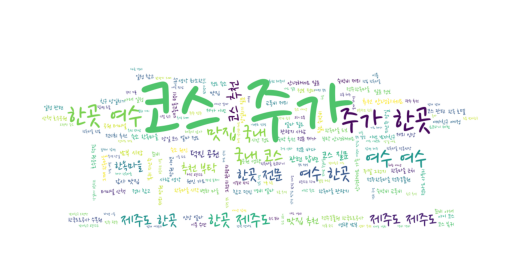

In [219]:
from PIL import Image
mask = np.array(Image.open('data/korea-house-black-fill.png'))
# mask.shape  # RGB+alpha
불용어 = set(['경주여행', '전주여행'])

wordcloud = WordCloud(
                font_path=font_path,
                background_color='white',
                colormap=color_map,
                max_words=300,
                max_font_size=200,
                scale=2,  # 이미지 크기의 비율(값이 클수록 이미지 저장 시 선명도가 높아짐)
                stopwords=불용어,
                mask=mask,
                random_state=4  # 랜덤 시드값을 맞추면 같은 모양의 워드 클라우드가 생성됨
).generate(jeonju)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [220]:
# 생성된 wordcloud 이미지 저장
wordcloud.to_file('data/jeonju_cloud.jpg')

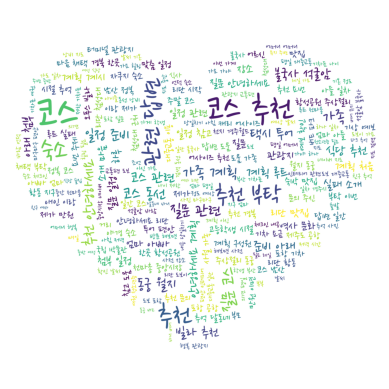

In [222]:
from PIL import Image
mask = np.array(Image.open('data/heart.jpg'))
# mask.shape  # RGB+alpha
불용어 = set(['경주여행', '전주여행'])

wordcloud = WordCloud(
                font_path=font_path,
                background_color='white',
                colormap=color_map,
                max_words=200,
                max_font_size=200,
                scale=2,  # 이미지 크기의 비율(값이 클수록 이미지 저장 시 선명도가 높아짐)
                stopwords=불용어,
                mask=mask,
                random_state=4  # 랜덤 시드값을 맞추면 같은 모양의 워드 클라우드가 생성됨
).generate(gyeongju)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [223]:
# 생성된 wordcloud 이미지 저장
wordcloud.to_file('data/gyeongju_cloud.png')